## 載入資料

In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

## 轉成dataframe
df = pd.read_excel('Trainset.xlsx')

df

,Category,Preference,Happiness,Sadness,Anger,Fear,Hate,Surprise,ADV_Ratio,ADJ_Ratio,...,Verb_VariationI,Verb_VariationII,Noun_Variation,Adjective_Variation,Adverb_Variation,Modifier_Variation,TF_IDF,TextRank,w2v_mean,Special Symbols Usage Ratio per Sentence
0,4,61,24,3,0,5,7,0,0.081,0.071,...,0.006,0.002,0.002,0.002,0.002,0.004,0.281294,0.249534,0.018449,0.35
1,4,75,12,4,0,4,4,0,0.050,0.070,...,0.012,0.004,0.004,0.004,0.004,0.007,0.169892,0.118722,0.018345,0.47
2,4,77,9,9,0,5,0,0,0.039,0.087,...,0.015,0.005,0.005,0.005,0.005,0.010,0.280422,0.094573,0.023554,0.40
3,4,63,26,0,0,0,11,0,0.086,0.086,...,0.020,0.005,0.005,0.005,0.005,0.010,0.540880,0.115173,0.015385,0.71
4,4,67,28,3,0,0,3,0,0.038,0.088,...,0.012,0.004,0.004,0.004,0.004,0.008,0.559125,0.166652,0.017807,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,3,68,14,9,0,0,9,0,0.028,0.055,...,0.022,0.008,0.008,0.008,0.008,0.016,0.292765,0.130750,0.014856,0.60
2150,3,62,18,1,0,2,13,4,0.071,0.065,...,0.004,0.001,0.001,0.001,0.001,0.003,0.477975,0.469559,0.006170,0.23
2151,3,44,18,12,0,0,21,6,0.076,0.084,...,0.012,0.004,0.004,0.004,0.004,0.009,0.136870,0.129129,-0.010523,0.00
2152,3,57,24,3,0,5,11,0,0.082,0.075,...,0.009,0.004,0.004,0.004,0.004,0.008,0.359963,0.209808,0.015197,0.44


## 資料前處理
##### 這裡實作使用的是數據型而非文字型資料進行小小分類任務練習
##### 數據型資料的前處理略有不同，文字型資料多了兩個步驟：處理文字之後特徵擷取，最後的表達會跟數據型資料一樣

### 缺失值處理及資料型態轉換
1. 確認資料是否有缺失值Non-Null Count，此份資料沒有(non-null)。有缺失值有(1)刪掉欄位、(2)刪掉列、(3)補平均值、(5)訓練模型預測該值等等的作法。
2. 確認各特徵的資料型態是否為可計算的型態(float、integer)，此份資料(Dtype)沒有不可計算的型態(如bool、objects)。如有，是資料內容做轉換。

In [2]:
df.dropna(inplace=True)
df

,Category,Preference,Happiness,Sadness,Anger,Fear,Hate,Surprise,ADV_Ratio,ADJ_Ratio,...,Verb_VariationI,Verb_VariationII,Noun_Variation,Adjective_Variation,Adverb_Variation,Modifier_Variation,TF_IDF,TextRank,w2v_mean,Special Symbols Usage Ratio per Sentence
0,4,61,24,3,0,5,7,0,0.081,0.071,...,0.006,0.002,0.002,0.002,0.002,0.004,0.281294,0.249534,0.018449,0.35
1,4,75,12,4,0,4,4,0,0.050,0.070,...,0.012,0.004,0.004,0.004,0.004,0.007,0.169892,0.118722,0.018345,0.47
2,4,77,9,9,0,5,0,0,0.039,0.087,...,0.015,0.005,0.005,0.005,0.005,0.010,0.280422,0.094573,0.023554,0.40
3,4,63,26,0,0,0,11,0,0.086,0.086,...,0.020,0.005,0.005,0.005,0.005,0.010,0.540880,0.115173,0.015385,0.71
4,4,67,28,3,0,0,3,0,0.038,0.088,...,0.012,0.004,0.004,0.004,0.004,0.008,0.559125,0.166652,0.017807,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,3,68,14,9,0,0,9,0,0.028,0.055,...,0.022,0.008,0.008,0.008,0.008,0.016,0.292765,0.130750,0.014856,0.60
2150,3,62,18,1,0,2,13,4,0.071,0.065,...,0.004,0.001,0.001,0.001,0.001,0.003,0.477975,0.469559,0.006170,0.23
2151,3,44,18,12,0,0,21,6,0.076,0.084,...,0.012,0.004,0.004,0.004,0.004,0.009,0.136870,0.129129,-0.010523,0.00
2152,3,57,24,3,0,5,11,0,0.082,0.075,...,0.009,0.004,0.004,0.004,0.004,0.008,0.359963,0.209808,0.015197,0.44


In [ ]:
df.info()

### 離群值處理
3. 確認是否有離群值(outliers)，非必要，視模型而定，常用於對離群值敏感的模型，如logistic regression，而tree-based則較不易。離群值的偵測方式視正向分布情況而定，
    
    (1)符合正向分布：
        對稱 - 3倍標準差法將某個數據點大於或小於與樣本平均值差3倍標準差(Z-score)定義為離群值。
        非對稱 - 四分位數間距法，四分位距(IQR)就是上四分位與下四分位的差值。通過IQR的1.5倍為標準，定義超過上四分位+1.5倍IQR距離，或者小於下四分位-1.5倍IQR距離的點為離群值。
    (2)不符合正向分布：可以用孤立森林方法(isolation forest)將離群值定義為分佈稀疏且離密度高的群體較遠的點。表示資料發生在此區域的機率很低。 
    
   離群值的處理方式：(1)直接刪除、(2)用平均值調整、(3)填充Z-score或IQR*1.5值、(4)不處理等等。

In [ ]:
df.columns[1:]

C:\Users\pigle\AppData\Local\Temp\ipykernel_12228\1867706587.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[name], ax=ax)
C:\Users\pigle\AppData\Local\Temp\ipykernel_12228\1867706587.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=name, data=df, ax=ax, palette=["#34495e"])
C:\Users\pigle\AppData\Local\Temp\ipykernel_12228\1867706587.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

{'Preference': 'symmetric', 'Happiness': 'highly skewed', 'Sadness': 'highly skewed', 'Anger': 'highly skewed', 'Fear': 'highly skewed', 'Hate': 'highly skewed', 'Surprise': 'highly skewed', 'ADV_Ratio': 'symmetric', 'ADJ_Ratio': 'symmetric', 'NOUN_Ratio': 'symmetric', 'VERB_Ratio': 'moderately skewed', 'CONJ_Ratio': 'highly skewed', 'PRON_Ratio': 'highly skewed', 'NUM_Ratio': 'highly skewed', 'PRT_Ratio': 'highly skewed', 'ADP_Ratio': 'highly skewed', 'Mean_Length_of_Sentence': 'highly skewed', 'Type': 'highly skewed', 'TTR': 'symmetric', 'Lexical_Density': 'highly skewed', 'Lexical_Variation': 'highly skewed', 'Verb_VariationI': 'highly skewed', 'Verb_VariationII': 'highly skewed', 'Noun_Variation': 'highly skewed', 'Adjective_Variation': 'highly skewed', 'Adverb_Variation': 'highly skewed', 'Modifier_Variation': 'highly skewed', 'TF_IDF': 'highly skewed', 'TextRank': 'highly skewed', 'w2v_mean': 'highly skewed', 'Special Symbols Usage Ratio per Sentence': 'highly skewed'}


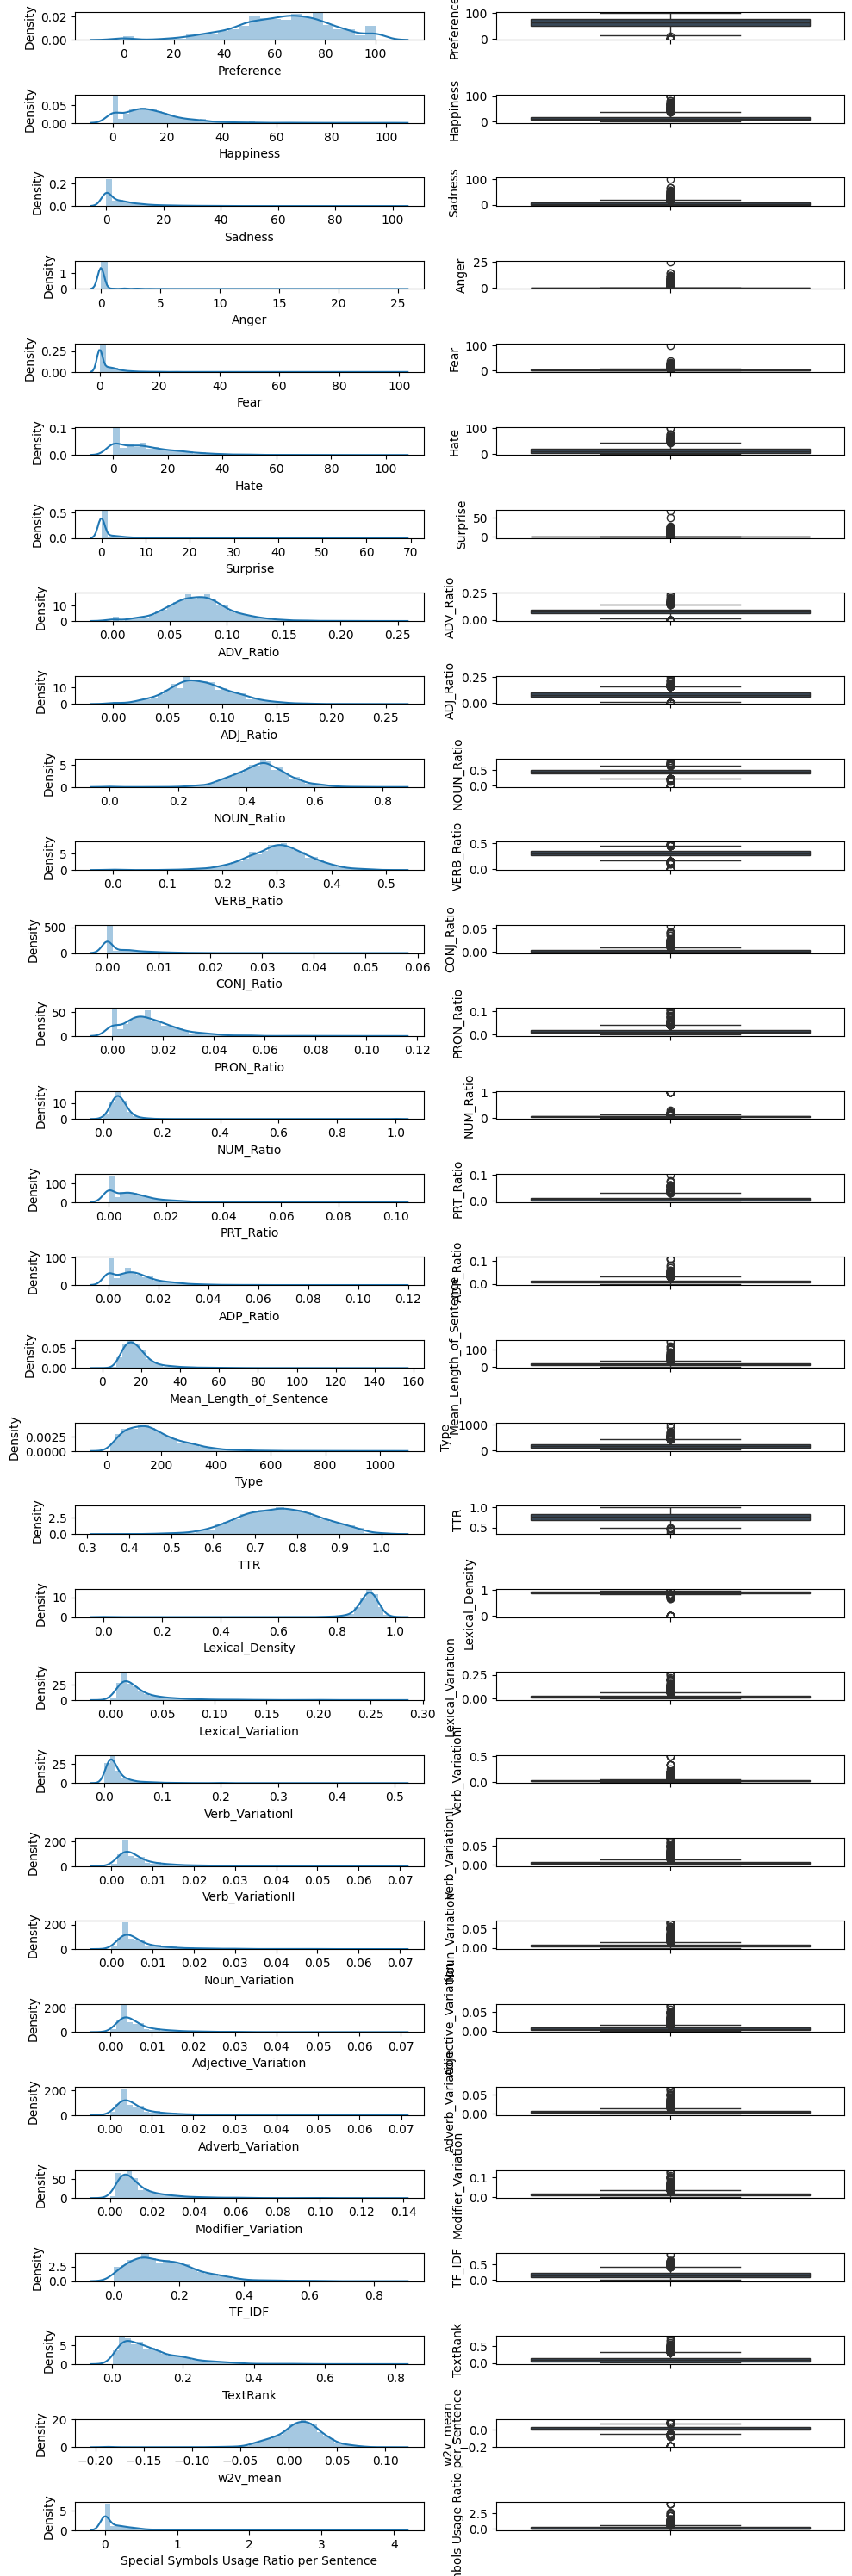

In [3]:
from scipy.stats import skew

## 畫一個由13*2個子圖組成的圖
fig, axes = plt.subplots(31, 2, figsize=(10,30))

## 因表格最後一欄是類別標註，所以:-1；又因左右都要畫某特徵的相關圖，所以他的名字要被用兩次
cols2plot = [c for c in df.columns[1:] for x in range(2)]
## 空字典裝每個特徵的偏度(skewness)
cols_skewness = {}

## 共有26個子圖(ax)，一個特徵要配一張，所以zip起來。又因想要左邊是正向方佈圖，右邊是箱型圖故初始化i=2，
## 每次迴圈都加1，偶數時繪正向方佈圖，即在左邊，反之亦然。
i = 2
for name, ax in zip(cols2plot, axes.flatten()):
    if i % 2 == 0:
        sns.distplot(df[name], ax=ax)
    else:
        sns.boxplot(y=name, data=df, ax=ax, palette=["#34495e"])
    
    ## 偏度判斷
    if cols_skewness.get(name) is None:
        skewness = round(skew(df[name]), 2)
        if skewness <= -1 or skewness >= 1:
            cols_skewness[name] = "highly skewed"
        elif skewness > -0.5 and skewness < 0.5:
            cols_skewness[name] = "symmetric"
        elif skewness > -1 and skewness < -0.5:
            cols_skewness[name] = "moderately skewed"
        elif skewness > 0.5 and skewness < 1:
            cols_skewness[name] = "moderately skewed"
        
    i += 1

plt.tight_layout()
print(cols_skewness)

In [4]:
## 自定義離群值處理的函式(針對每個特徵處理)，需輸入:資料dataframe、每個特徵的偏度字典、
## 處理方式(trim:刪除；cap:填充Z-score*3(if normally distributed)、或IQR*1.5(if not normally distributed))
def outliers_treatment(df, cols_skewness, method):
    for col in cols_skewness:
        if cols_skewness.get(col) == "symmetric":
            highest_allowed = df[col].mean() + 3*df[col].std()
            lowest_allowed = df[col].mean() - 3*df[col].std()

            if len(df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)]) >= 1:
                print("outliers index in "+col+":", df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)].index)
                
        elif re.search("skewed", cols_skewness.get(col)):
            percentile25 = df[col].quantile(0.25)
            percentile75 = df[col].quantile(0.75)
            iqr = percentile75 - percentile25

            highest_allowed = percentile75 + 1.5 * iqr
            lowest_allowed = percentile25 - 1.5 * iqr
            if len(df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)]) >= 1:
                print("outliers index in "+col+":", df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)].index)
            
        if method == "trim":
            df = df[(df[col] < highest_allowed) & (df[col] > lowest_allowed)].reset_index(drop=True)
        elif method == "cap":
            df[col] = np.where(df[col]>highest_allowed,
                                highest_allowed,
                                np.where(df[col]<lowest_allowed,
                                        lowest_allowed,
                                        df[col]))
    return df

method = "cap"
df = outliers_treatment(df, cols_skewness, method)
df

outliers index in Preference: Index([  32,  304,  332,  913,  915,  959,  988, 1004, 1227, 1348, 1356, 1380,
       1430, 1485, 1529, 1532, 1555, 1615, 1622, 1651, 1690, 1713, 2130, 2136,
       2137, 2138, 2139, 2140, 2141, 2142, 2143],
      dtype='int64')
outliers index in Happiness: Index([  19,   30,   41,   45,   65,   79,  110,  179,  195,  200,  213,  214,
        218,  242,  262,  270,  291,  302,  304,  318,  321,  328,  333,  340,
        343,  348,  351,  352,  356,  371,  385,  397,  398,  405,  492,  500,
        709,  735,  755,  767,  795,  799,  805,  810,  815,  837,  840,  854,
        856,  964, 1013, 1052, 1107, 1169, 1170, 1219, 1223, 1226, 1227, 1246,
       1257, 1268, 1348, 1356, 1430, 1439, 1489, 1490, 1493, 1735, 1754, 1762,
       1822, 1829, 1832, 1945, 2023, 2130],
      dtype='int64')
outliers index in Sadness: Index([ 115,  186,  188,  201,  205,  238,  247,  256,  303,  308,
       ...
       1977, 1985, 1988, 1994, 2068, 2075, 2079, 2086, 2090, 2135],


,Category,Preference,Happiness,Sadness,Anger,Fear,Hate,Surprise,ADV_Ratio,ADJ_Ratio,...,Verb_VariationI,Verb_VariationII,Noun_Variation,Adjective_Variation,Adverb_Variation,Modifier_Variation,TF_IDF,TextRank,w2v_mean,Special Symbols Usage Ratio per Sentence
0,4,61.0,24.0,3.0,0.0,5.0,7.0,0.0,0.081,0.071,...,0.006,0.002,0.002,0.002,0.002,0.004,0.281294,0.249534,0.018449,0.35
1,4,75.0,12.0,4.0,0.0,4.0,4.0,0.0,0.050,0.070,...,0.012,0.004,0.004,0.004,0.004,0.007,0.169892,0.118722,0.018345,0.47
2,4,77.0,9.0,9.0,0.0,5.0,0.0,0.0,0.039,0.087,...,0.015,0.005,0.005,0.005,0.005,0.010,0.280422,0.094573,0.023554,0.40
3,4,63.0,26.0,0.0,0.0,0.0,11.0,0.0,0.086,0.086,...,0.020,0.005,0.005,0.005,0.005,0.010,0.430384,0.115173,0.015385,0.60
4,4,67.0,28.0,3.0,0.0,0.0,3.0,0.0,0.038,0.088,...,0.012,0.004,0.004,0.004,0.004,0.008,0.430384,0.166652,0.017807,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,3,68.0,14.0,9.0,0.0,0.0,9.0,0.0,0.028,0.055,...,0.022,0.008,0.008,0.008,0.008,0.016,0.292765,0.130750,0.014856,0.60
2150,3,62.0,18.0,1.0,0.0,2.0,13.0,0.0,0.071,0.065,...,0.004,0.001,0.001,0.001,0.001,0.003,0.430384,0.324453,0.006170,0.23
2151,3,44.0,18.0,12.0,0.0,0.0,21.0,0.0,0.076,0.084,...,0.012,0.004,0.004,0.004,0.004,0.009,0.136870,0.129129,-0.010523,0.00
2152,3,57.0,24.0,3.0,0.0,5.0,11.0,0.0,0.082,0.075,...,0.009,0.004,0.004,0.004,0.004,0.008,0.359963,0.209808,0.015197,0.44


### 資料平衡檢查
4. 查看資料於各類是否平衡。若否，可以做資料增強(文字型資料須從文字方面增強)。

In [ ]:
## 該資料看起來平衡。
wine = ["#842C46", "#B2608D", "#6C5368"]
ax = sns.countplot(x="Category", data=df, palette=wine)

### 特徵縮放
5. 做資料標準化(standardization；不受離群值影響)或正規化(normalization；受離群值影響)。非必要，視模型而定，常用於SVM或KNN等基於數據點之間的距離來確定其相似性的模型。一般特徵篩選會使用標準或正規化後的資料，但沒有一定。

In [ ]:
df.iloc[:, 1:]

In [5]:
from sklearn.preprocessing import MinMaxScaler

## 複製一份資料用以做特徵縮放
df_normalized = df.copy()

## 這裡做資料正規化，將資料縮放到0-1之間
for col in df_normalized.iloc[:, 1:].columns:
    df_normalized[col] = MinMaxScaler(feature_range=(0,1)).fit_transform(np.array(df_normalized[col]).reshape(-1,1))

df_normalized

,Category,Preference,Happiness,Sadness,Anger,Fear,Hate,Surprise,ADV_Ratio,ADJ_Ratio,...,Verb_VariationI,Verb_VariationII,Noun_Variation,Adjective_Variation,Adverb_Variation,Modifier_Variation,TF_IDF,TextRank,w2v_mean,Special Symbols Usage Ratio per Sentence
0,4,0.592263,0.623377,0.154839,0.0,0.666667,0.162791,0.0,0.498151,0.407373,...,0.116505,0.129032,0.129032,0.129032,0.129032,0.119403,0.653589,0.768444,0.555849,0.583333
1,4,0.738630,0.311688,0.206452,0.0,0.533333,0.093023,0.0,0.307501,0.401635,...,0.233010,0.258065,0.258065,0.258065,0.258065,0.208955,0.394745,0.364137,0.554965,0.783333
2,4,0.759540,0.233766,0.464516,0.0,0.666667,0.000000,0.0,0.239850,0.499175,...,0.291262,0.322581,0.322581,0.322581,0.322581,0.298507,0.651562,0.289497,0.599090,0.666667
3,4,0.613172,0.675325,0.000000,0.0,0.000000,0.255814,0.0,0.528901,0.493438,...,0.388350,0.322581,0.322581,0.322581,0.322581,0.298507,1.000000,0.353166,0.529898,1.000000
4,4,0.654992,0.727273,0.154839,0.0,0.000000,0.069767,0.0,0.233700,0.504913,...,0.233010,0.258065,0.258065,0.258065,0.258065,0.238806,1.000000,0.512276,0.550411,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,3,0.665446,0.363636,0.464516,0.0,0.000000,0.209302,0.0,0.172200,0.315571,...,0.427184,0.516129,0.516129,0.516129,0.516129,0.477612,0.680242,0.401311,0.525415,1.000000
2150,3,0.602718,0.467532,0.051613,0.0,0.266667,0.302326,0.0,0.436651,0.372947,...,0.077670,0.064516,0.064516,0.064516,0.064516,0.089552,1.000000,1.000000,0.451846,0.383333
2151,3,0.414531,0.467532,0.619355,0.0,0.000000,0.488372,0.0,0.467401,0.481962,...,0.233010,0.258065,0.258065,0.258065,0.258065,0.268657,0.318017,0.396301,0.310450,0.000000
2152,3,0.550444,0.623377,0.154839,0.0,0.666667,0.255814,0.0,0.504301,0.430323,...,0.174757,0.258065,0.258065,0.258065,0.258065,0.238806,0.836377,0.645661,0.528302,0.733333


### 特徵篩選
6. 特徵篩選有種方法，如過濾法、嵌入法、降維法等等，每個方法裡也有各式不同的統計方法。這裡介紹及使用過濾法裡的相關性過濾統計 - 相互資訊法(mutual information)用來檢驗每個特徵與類別之間是否有顯著性關係
   
**注意!並非所有低分特徵都需要被刪除，還是要根據人類需求與判斷決定去留**

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
y


In [6]:
from sklearn.feature_selection import mutual_info_classif

## 因要使用統計方法比較特徵跟類別間的關係，故須先定義特徵(X)和類別(y)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

## 介於0-1之間， 0：表示兩組數據相互獨立，1：表示兩組數據完全相關，結果值大於0的特徵(與標籤相關的特徵)
feature_scores = mutual_info_classif(X, y, random_state=0)

## 找出最高分的特徵，0.4是隨機設置的值，可以調整，或是只要前幾高就好也可以
high_score_features = []
for score, f_name in zip(feature_scores, X.columns):
    if score >= 0.05:
        high_score_features.append(f_name)

## 已經找出最相關的特徵，這裡只掉只要這些欄位。先不跟y(類別)合併，下面有要用到分開的地方
df_mic = X[high_score_features]
df_mic

,Preference,Happiness,Sadness,Hate,ADV_Ratio,NOUN_Ratio,VERB_Ratio,PRT_Ratio,Mean_Length_of_Sentence,Type,...,Verb_VariationI,Verb_VariationII,Noun_Variation,Adjective_Variation,Adverb_Variation,Modifier_Variation,TF_IDF,TextRank,w2v_mean,Special Symbols Usage Ratio per Sentence
0,61.0,24.0,3.0,7.0,0.081,0.471,0.310,0.014,22.826,360.0,...,0.006,0.002,0.002,0.002,0.002,0.004,0.281294,0.249534,0.018449,0.35
1,75.0,12.0,4.0,4.0,0.050,0.513,0.289,0.003,19.000,233.0,...,0.012,0.004,0.004,0.004,0.004,0.007,0.169892,0.118722,0.018345,0.47
2,77.0,9.0,9.0,0.0,0.039,0.510,0.320,0.019,13.267,168.0,...,0.015,0.005,0.005,0.005,0.005,0.010,0.280422,0.094573,0.023554,0.40
3,63.0,26.0,0.0,11.0,0.086,0.502,0.231,0.014,16.500,160.0,...,0.020,0.005,0.005,0.005,0.005,0.010,0.430384,0.115173,0.015385,0.60
4,67.0,28.0,3.0,3.0,0.038,0.515,0.328,0.000,14.500,162.0,...,0.012,0.004,0.004,0.004,0.004,0.008,0.430384,0.166652,0.017807,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,68.0,14.0,9.0,9.0,0.028,0.483,0.310,0.021,26.600,89.0,...,0.022,0.008,0.008,0.008,0.008,0.016,0.292765,0.130750,0.014856,0.60
2150,62.0,18.0,1.0,13.0,0.071,0.429,0.350,0.003,17.140,431.0,...,0.004,0.001,0.001,0.001,0.001,0.003,0.430384,0.324453,0.006170,0.23
2151,44.0,18.0,12.0,21.0,0.076,0.440,0.336,0.004,20.727,180.0,...,0.012,0.004,0.004,0.004,0.004,0.009,0.136870,0.129129,-0.010523,0.00
2152,57.0,24.0,3.0,11.0,0.082,0.366,0.370,0.010,14.333,191.0,...,0.009,0.004,0.004,0.004,0.004,0.008,0.359963,0.209808,0.015197,0.44


In [7]:
## 做特徵縮放後的資料的特徵篩選
X = df_normalized.iloc[:, 1:]

## 介於0-1之間， 0：表示兩組數據相互獨立，1：表示兩組數據完全相關，結果值大於0的特徵(與標籤相關的特徵)
feature_scores = mutual_info_classif(X, y, random_state=0)

high_score_features = []
for score, f_name in zip(feature_scores, X.columns):
    if score >= 0.05:
        high_score_features.append(f_name)
df_normalized_mic = X[high_score_features]
df_normalized_mic

,Preference,Happiness,Sadness,Hate,ADV_Ratio,NOUN_Ratio,VERB_Ratio,PRT_Ratio,Mean_Length_of_Sentence,Type,...,Verb_VariationI,Verb_VariationII,Noun_Variation,Adjective_Variation,Adverb_Variation,Modifier_Variation,TF_IDF,TextRank,w2v_mean,Special Symbols Usage Ratio per Sentence
0,0.592263,0.623377,0.154839,0.162791,0.498151,0.554999,0.520270,0.466667,0.661557,0.829736,...,0.116505,0.129032,0.129032,0.129032,0.129032,0.119403,0.653589,0.768444,0.555849,0.583333
1,0.738630,0.311688,0.206452,0.093023,0.307501,0.637757,0.449324,0.100000,0.544608,0.525180,...,0.233010,0.258065,0.258065,0.258065,0.258065,0.208955,0.394745,0.364137,0.554965,0.783333
2,0.759540,0.233766,0.464516,0.000000,0.239850,0.631845,0.554054,0.633333,0.369369,0.369305,...,0.291262,0.322581,0.322581,0.322581,0.322581,0.298507,0.651562,0.289497,0.599090,0.666667
3,0.613172,0.675325,0.000000,0.255814,0.528901,0.616082,0.253378,0.466667,0.468191,0.350120,...,0.388350,0.322581,0.322581,0.322581,0.322581,0.298507,1.000000,0.353166,0.529898,1.000000
4,0.654992,0.727273,0.154839,0.069767,0.233700,0.641697,0.581081,0.000000,0.407058,0.354916,...,0.233010,0.258065,0.258065,0.258065,0.258065,0.238806,1.000000,0.512276,0.550411,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,0.665446,0.363636,0.464516,0.209302,0.172200,0.578644,0.520270,0.700000,0.776916,0.179856,...,0.427184,0.516129,0.516129,0.516129,0.516129,0.477612,0.680242,0.401311,0.525415,1.000000
2150,0.602718,0.467532,0.051613,0.302326,0.436651,0.472241,0.655405,0.100000,0.487754,1.000000,...,0.077670,0.064516,0.064516,0.064516,0.064516,0.089552,1.000000,1.000000,0.451846,0.383333
2151,0.414531,0.467532,0.619355,0.488372,0.467401,0.493916,0.608108,0.133333,0.597397,0.398082,...,0.233010,0.258065,0.258065,0.258065,0.258065,0.268657,0.318017,0.396301,0.310450,0.000000
2152,0.550444,0.623377,0.154839,0.255814,0.504301,0.348105,0.722973,0.333333,0.401953,0.424460,...,0.174757,0.258065,0.258065,0.258065,0.258065,0.238806,0.836377,0.645661,0.528302,0.733333


## 訓練及測試數據產生

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_mic.iloc[:, :-1], y, test_size=0.3, random_state=1)
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(df_normalized_mic.iloc[:, :-1], y, test_size=0.3, random_state=1)

## 模型訓練與評估

### Decision Tree

precision:  0.37
recall:     0.42
f1_score:   0.36
              precision    recall  f1-score   support

           0       0.42      0.74      0.54       136
           1       0.55      0.48      0.51       138
           2       0.56      0.24      0.34       119
           3       0.00      0.00      0.00       126
           4       0.31      0.57      0.40       128

    accuracy                           0.42       647
   macro avg       0.37      0.41      0.36       647
weighted avg       0.37      0.42      0.36       647



c:\Users\pigle\.conda\envs\112NLP\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pigle\.conda\envs\112NLP\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pigle\.conda\envs\112NLP\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pigle\.conda\envs\112NLP\Lib\sit

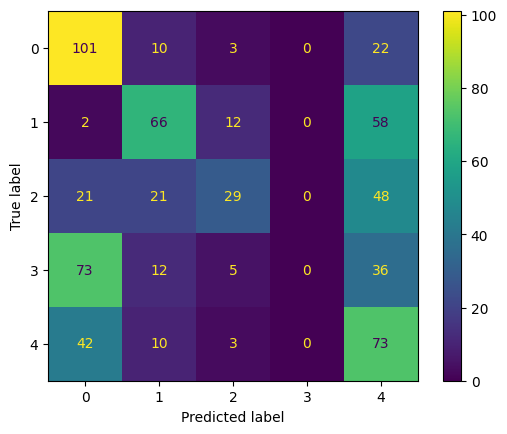

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 初始化分類器
dt_clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
## 訓練模型
dt_clf.fit(X_train, y_train)
## 預測測試集以做模型評估
y_pred = dt_clf.predict(X_test)

## 計算成績
print("precision: ", round(precision_score(y_test, y_pred, average='weighted'), 2))
print("recall:    ", round(recall_score(y_test, y_pred, average='weighted'), 2))
print("f1_score:  ", round(f1_score(y_test, y_pred, average='weighted'), 2))
target_names = ["0","1","2","3","4"]
## 分類結果回報
print(classification_report(y_test, y_pred, target_names=target_names))

## 混淆矩陣繪製
confusion_matrix_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_, 
                                    display_labels=target_names)

cm_display.plot()
plt.show()

#### 超參數調優
##### 調整參數有多種方法，如格點搜尋法(Grid Search)、隨機搜尋法(Randomized Search)、貝葉斯優畫法(Bayes Optimization)等等。這裡使用隨機搜尋法

In [10]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

## 定義要調優的參數及要嘗試的值
hyper_params = {'max_depth': [2, 3, 5, 10, 20],
                'min_samples_leaf': [5, 10, 20, 50, 100],}

## 初始化調參函式，以f1分數作為評估參數組合的好壞
randomized_search = RandomizedSearchCV(dt_clf, hyper_params, random_state=0, scoring="f1")
randomized_search.fit(X_train, y_train)

## 將調參結果轉成表格印出，rank_test_score欄位排序最佳到最差組合，params欄位顯示參數組合
tuned_results_df = pd.DataFrame(randomized_search.cv_results_)
tuned_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010162,0.001367,0.003355,0.001604,5,3,"{'min_samples_leaf': 5, 'max_depth': 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.006916,0.000915,0.003186,0.000955,20,2,"{'min_samples_leaf': 20, 'max_depth': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.010467,0.001127,0.004003,0.000909,100,10,"{'min_samples_leaf': 100, 'max_depth': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.023505,0.002091,0.003790,0.000915,10,10,"{'min_samples_leaf': 10, 'max_depth': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.024235,0.005875,0.006956,0.002934,10,5,"{'min_samples_leaf': 10, 'max_depth': 5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


#### 用新參數訓練

precision:  0.53
recall:     0.52
f1_score:   0.52
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       136
           1       0.58      0.62      0.60       138
           2       0.51      0.30      0.38       119
           3       0.48      0.60      0.54       126
           4       0.47      0.55      0.50       128

    accuracy                           0.52       647
   macro avg       0.52      0.52      0.51       647
weighted avg       0.53      0.52      0.52       647



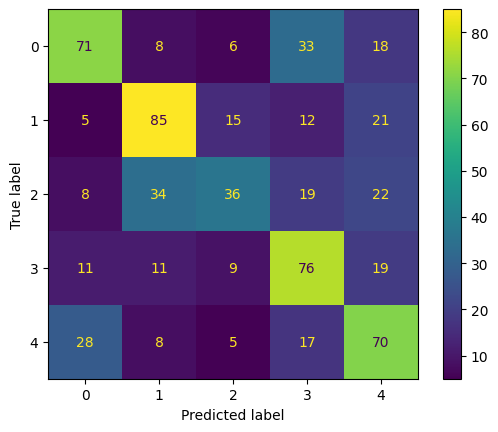

In [15]:
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

## 調參後f1 score進步0.03
print("precision: ", round(precision_score(y_test, y_pred, average='weighted'), 2))
print("recall:    ", round(recall_score(y_test, y_pred, average='weighted'), 2))
print("f1_score:  ", round(f1_score(y_test, y_pred, average='weighted'), 2))
target_names = ["0","1","2","3","4"]
print(classification_report(y_test, y_pred, target_names=target_names))

confusion_matrix_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_, 
                                    display_labels=target_names)

cm_display.plot()
plt.show()

#### 儲存和載入模型

In [ ]:
import pickle

with open("dt_depth3_leaf5_f97.pkl", "wb") as file:
    pickle.dump(dt_clf, file)
    
with open("dt_depth3_leaf5_f97.pkl", "rb") as file:
    dt_clf = pickle.load(file)

#### 可視化decision tree

In [ ]:
from sklearn import tree
from dtreeviz.trees import *
%matplotlib inline 

dtreeviz(dt_clf, 
         X_train, 
         y_train,
         target_name='target',
         feature_names=X_train.columns, 
         class_names=target_names) 

#### 查看對此模型來說重要特徵

In [ ]:
## 以字典裝特徵和他們的重要值並依高到低排序(重要度意為，該特徵在分類時做出的貢獻，
## 即使用他分類可以多大程度分開類別)
feature_importances = {f: dt_clf.feature_importances_[i] for i, f in enumerate(X_train.columns)}
feature_importances_sorted = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)}

## 將字典轉成兩個list(順序是有對應的)
keys = list(feature_importances_sorted.keys())
vals = [float(feature_importances_sorted[k]) for k in keys]

## 畫長條圖
sns.barplot(x=vals, y=keys, palette="vlag_r")
plt.xlabel("importance value")
plt.show()

#### 使用假的新wine data預測並可視化

In [16]:
## 創建假資料並預測
a = pd.read_excel('Testsetresult.xlsx')
pseudo_data = pd.DataFrame(a, columns=X_train.columns)
pseudo_pred = dt_clf.predict(pseudo_data)
print("Testset", pseudo_data)
print("new data prediction:", str(pseudo_pred[0]))

result_df = pd.DataFrame({'Index': range(1, len(pseudo_pred) + 1), 'Category': pseudo_pred})
result_df.set_index('Index', inplace=True)

# Map the numeric categories to the corresponding labels
category_mapping = {
    0: 'Cuisine',
    1: 'Lifestyles',
    2: 'Literature',
    3: 'Self-help',
    4: 'Travel'
}

result_df['Category'] = result_df['Category'].map(category_mapping)

# Print the result DataFrame
result_df.to_excel('Submission(Decision_tree).xlsx')

## 可視化該資料於decision tree分類的路徑
dtreeviz(dt_clf, 
         X_train, 
         y_train,
         target_name='target',
         feature_names=X_train.columns, 
         class_names=target_names,
         X=pseudo_data.iloc[0])

Testset      Preference  Happiness  Sadness  Hate  ADV_Ratio  NOUN_Ratio  VERB_Ratio  \
0          70.0       19.0      4.0   4.0      0.078       0.359       0.303   
1          70.0        7.0      2.0  12.0      0.063       0.466       0.304   
2          42.0       12.0      4.0  40.0      0.105       0.324       0.344   
3          37.0       12.0     14.0  33.0      0.110       0.279       0.397   
4          59.0       26.0      4.0  11.0      0.110       0.436       0.250   
..          ...        ...      ...   ...        ...         ...         ...   
419        81.0       14.0      0.0   5.0      0.071       0.431       0.292   
420        52.0       45.0      2.0   2.0      0.053       0.591       0.201   
421        51.0       14.0     14.0  19.0      0.106       0.340       0.340   
422        87.0        0.0      0.0  13.0      0.026       0.590       0.224   
423        71.0        9.0      2.0  12.0      0.047       0.445       0.304   

     PRT_Ratio  Mean_Length_of_

NameError: name 'dtreeviz' is not defined

### SVM

precision:  0.46
recall:     0.47
f1_score:   0.46
              precision    recall  f1-score   support

           0       0.48      0.68      0.56       136
           1       0.43      0.51      0.47       138
           2       0.40      0.30      0.34       119
           3       0.57      0.60      0.58       126
           4       0.43      0.23      0.30       128

    accuracy                           0.47       647
   macro avg       0.46      0.46      0.45       647
weighted avg       0.46      0.47      0.46       647



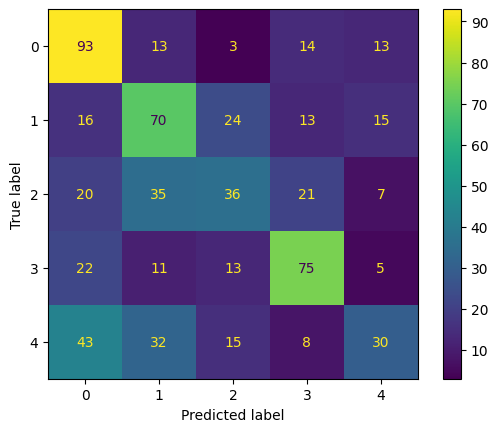

In [17]:
from sklearn.svm import SVC

## 跟decision tree一樣的步驟
svm_clf = SVC(kernel='rbf', gamma=0.1, C=0.1)
svm_clf.fit(X_train_nm, y_train_nm)
y_pred = svm_clf.predict(X_test_nm)

print("precision: ", round(precision_score(y_test_nm, y_pred, average='weighted'), 2))
print("recall:    ", round(recall_score(y_test_nm, y_pred, average='weighted'), 2))
print("f1_score:  ", round(f1_score(y_test_nm, y_pred, average='weighted'), 2))
target_names = ["0","1","2","3","4"]
print(classification_report(y_test_nm, y_pred, target_names=target_names))

confusion_matrix_ = confusion_matrix(y_test_nm, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_, 
                                    display_labels=target_names)

cm_display.plot()
plt.show()

#### 超參數調優

In [18]:
## 跟decision tree一樣的步驟，只是參數不同
hyper_params = {"gamma": [0.1, 1, 10, 100],
                'C': [0.1, 1, 10]}
randomized_search = RandomizedSearchCV(svm_clf, hyper_params, random_state=0, scoring="f1")
randomized_search.fit(X_train_nm, y_train_nm)
tuned_results_df = pd.DataFrame(randomized_search.cv_results_)
tuned_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099178,0.002981,0.036928,0.007155,10,1,"{'gamma': 10, 'C': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.143252,0.020104,0.043031,0.003722,100,10,"{'gamma': 100, 'C': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.059610,0.005727,0.032002,0.002635,0.1,1,"{'gamma': 0.1, 'C': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.103996,0.009899,0.033423,0.003390,10,10,"{'gamma': 10, 'C': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.086708,0.008127,0.037317,0.004626,10,0.1,"{'gamma': 10, 'C': 0.1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


#### 用新參數訓練

precision:  0.61
recall:     0.6
f1_score:   0.61
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       136
           1       0.60      0.65      0.62       138
           2       0.48      0.49      0.48       119
           3       0.72      0.66      0.69       126
           4       0.56      0.64      0.60       128

    accuracy                           0.60       647
   macro avg       0.61      0.60      0.60       647
weighted avg       0.61      0.60      0.61       647



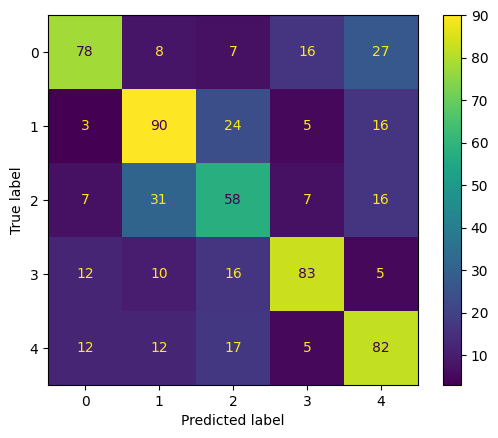

In [24]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1)
svm_clf.fit(X_train_nm, y_train_nm)
y_pred = svm_clf.predict(X_test_nm)

## 調參後f1 score進步0.67
print("precision: ", round(precision_score(y_test_nm, y_pred, average='weighted'), 2))
print("recall:    ", round(recall_score(y_test_nm, y_pred, average='weighted'), 2))
print("f1_score:  ", round(f1_score(y_test_nm, y_pred, average='weighted'), 2))
target_names = ["0","1","2","3","4"]
print(classification_report(y_test_nm, y_pred, target_names=target_names))

confusion_matrix_ = confusion_matrix(y_test_nm, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_, 
                                    display_labels=target_names)

cm_display.plot()
plt.show()

#### 儲存和載入模型

In [25]:
import pickle

with open("svm_gamm10_c1_f97.pkl", "wb") as file:
    pickle.dump(svm_clf, file)
    
with open("svm_gamm10_c1_f97.pkl", "rb") as file:
    svm_clf = pickle.load(file)

#### 可視化SVM
##### 實作只提供可視化兩維，所以需選擇兩個特徵重新訓練只有兩個特徵的SVM畫圖。這裡特徵篩選後有六個特徵，六維資料畫不出來。

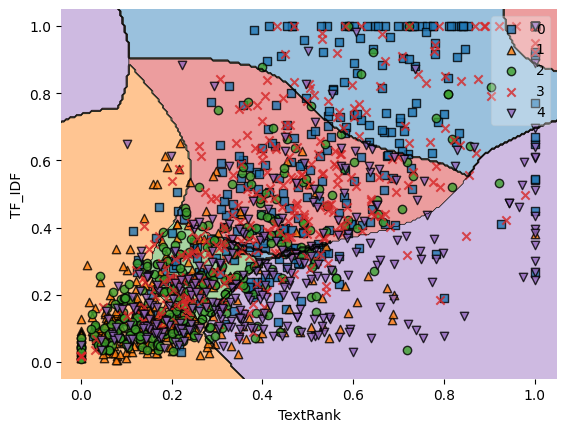

In [26]:
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

## 自定義SVM可視化，需輸入訓練集資料、兩個要可視化的特徵(list)、兩個參數(gamma、C)
def svm_vizualize(X_train_nm, columns2plot, gamma, C):
    col2plot_id = [i for i, c in enumerate(X_train_nm.columns) if c in columns2plot]
    X = X_train_nm.iloc[:, col2plot_id].to_numpy()

    svm_clf_twod = SVC(kernel='rbf', gamma=gamma, C=C)
    svm_clf_twod.fit(X, y_train_nm.to_numpy())

    plot_decision_regions(X=X, y=y_train_nm.astype(np.int_).to_numpy(), clf=svm_clf_twod, legend=1)
    plt.xlim([min(X_train_nm[columns2plot[0]])-0.05,max(X_train_nm[columns2plot[0]])+0.05])
    plt.xlabel(columns2plot[0])
    plt.ylim([min(X_train_nm[columns2plot[1]])-0.05,max(X_train_nm[columns2plot[1]])+0.05])
    plt.ylabel(columns2plot[1])
    plt.show()
    
columns2plot = ["TextRank", "TF_IDF"]
svm_vizualize(X_train_nm, columns2plot, gamma=10, C=1)

#### 查看對此模型來說重要特徵

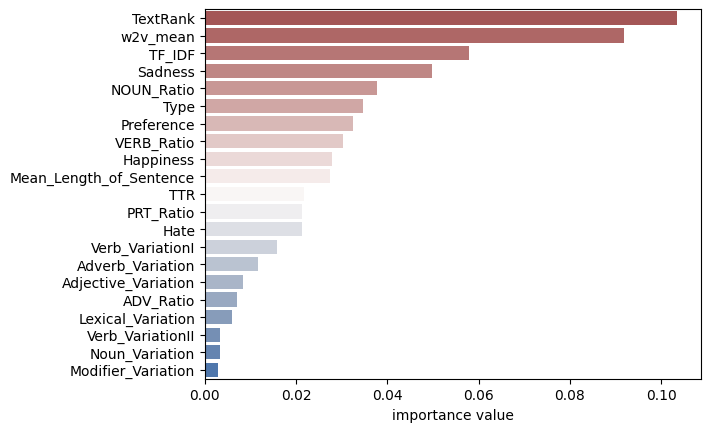

In [27]:
from sklearn.inspection import permutation_importance

## 計算SVM分類時的特徵重要度
perm_importance = permutation_importance(svm_clf, X_test_nm, y_test_nm)

## 跟decision tree步驟一樣
feature_importances = {f: perm_importance.importances_mean[i] for i, f in enumerate(X_train_nm.columns)}
feature_importances_sorted = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)}

keys = list(feature_importances_sorted.keys())
vals = [float(feature_importances_sorted[k]) for k in keys]
sns.barplot(x=vals, y=keys, palette="vlag_r")
plt.xlabel("importance value")
plt.show()

#### Testset預測

##### 特徵縮放

In [28]:
from sklearn.preprocessing import MinMaxScaler

## 複製一份資料用以做特徵縮放
pseudo_data = pd.read_excel('Testsetresult.xlsx')
pseudo_data_normalized = pseudo_data.copy()

## 這裡做資料正規化，將資料縮放到0-1之間
for col in pseudo_data_normalized.iloc[:, 6:].columns:
    pseudo_data_normalized[col] = MinMaxScaler(feature_range=(0,1)).fit_transform(np.array(pseudo_data_normalized[col]).reshape(-1,1))

pseudo_data_normalized.to_excel('Testset(data_normalized).xlsx')

##### 預測

In [29]:
## 跟decision tree步驟一樣
pseudo_data1 = pd.DataFrame(pseudo_data_normalized, columns=X_train_nm.columns)
pseudo_pred = svm_clf.predict(pseudo_data1)
print("Testset\n", pseudo_data1)
print("new data prediction:", str(pseudo_pred[0]))


result_df = pd.DataFrame({'Index': range(1, len(pseudo_pred) + 1), 'Category': pseudo_pred})
result_df.set_index('Index', inplace=True)

# Map the numeric categories to the corresponding labels
category_mapping = {
    0: 'Cuisine',
    1: 'Lifestyles',
    2: 'Literature',
    3: 'Self-help',
    4: 'Travel'
}

result_df['Category'] = result_df['Category'].map(category_mapping)

# Print the result DataFrame
result_df.to_excel('Submission(SVM).xlsx')

Testset
      Preference  Happiness   Sadness  Hate  ADV_Ratio  NOUN_Ratio  VERB_Ratio  \
0          0.70       0.19  0.076923  0.04      0.312    0.218456    0.487805   
1          0.70       0.07  0.038462  0.12      0.252    0.419962    0.490854   
2          0.42       0.12  0.076923  0.40      0.420    0.152542    0.612805   
3          0.37       0.12  0.269231  0.33      0.440    0.067797    0.774390   
4          0.59       0.26  0.076923  0.11      0.440    0.363465    0.326220   
..          ...        ...       ...   ...        ...         ...         ...   
419        0.81       0.14  0.000000  0.05      0.284    0.354049    0.454268   
420        0.52       0.45  0.038462  0.02      0.212    0.655367    0.176829   
421        0.51       0.14  0.269231  0.19      0.424    0.182674    0.600610   
422        0.87       0.00  0.000000  0.13      0.104    0.653484    0.246951   
423        0.71       0.09  0.038462  0.12      0.188    0.380414    0.490854   

     PRT_Ratio  Me

##### 畫圖

In [ ]:
## 跟上面SVM可視化函式一樣，這裡需再放剛剛創建的假資料
def svm_vizualize(X_train_nm, columns2plot, gamma, C, pseudo_data):
    col2plot_id = [i for i, c in enumerate(X_train_nm.columns) if c in columns2plot]
    X = X_train_nm.iloc[:, col2plot_id].to_numpy()
    pseud_X = pseudo_data.iloc[:, col2plot_id].to_numpy()

    svm_clf_twod = SVC(kernel='rbf', gamma=gamma, C=C)
    svm_clf_twod.fit(X, y_train_nm.to_numpy())

    pseudo_pred = svm_clf_twod.predict(pseud_X)[0]

    ax = plot_decision_regions(X=X, y=y_train_nm.astype(np.int_).to_numpy(), clf=svm_clf_twod, legend=1)
    plt.xlim([min(X_train_nm[columns2plot[0]])-0.05,max(X_train_nm[columns2plot[0]])+0.05])
    plt.xlabel(columns2plot[0])
    plt.ylim([min(X_train_nm[columns2plot[1]])-0.05,max(X_train_nm[columns2plot[1]])+0.05])
    plt.ylabel(columns2plot[1])

    if pseudo_pred == 0: ax.plot(pseud_X[0][0], pseud_X[0][1], 's', markersize=12, color="red")
    elif pseudo_pred == 1: ax.plot(pseud_X[0][0], pseud_X[0][1], '^', markersize=12, color="red")
    elif pseudo_pred == 2: ax.plot(pseud_X[0][0], pseud_X[0][1], 'o', markersize=12, color="red")

    plt.show()
    
## 注意!因為這裡是只用兩個特徵進行訓練、預測和繪圖，可能會和原本SVM的預測結果不同
## 新數據以紅色圖樣標出
columns2plot = ["TextRank", "TF_IDF"]
svm_vizualize(X_train_nm, columns2plot, gamma=10, C=1, pseudo_data=pseudo_data1)

### RF

最佳參數: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}
最佳模型的F1 Score: 0.62
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       136
           1       0.60      0.67      0.63       138
           2       0.49      0.50      0.49       119
           3       0.73      0.67      0.70       126
           4       0.60      0.59      0.59       128

    accuracy                           0.62       647
   macro avg       0.62      0.61      0.61       647
weighted avg       0.62      0.62      0.62       647



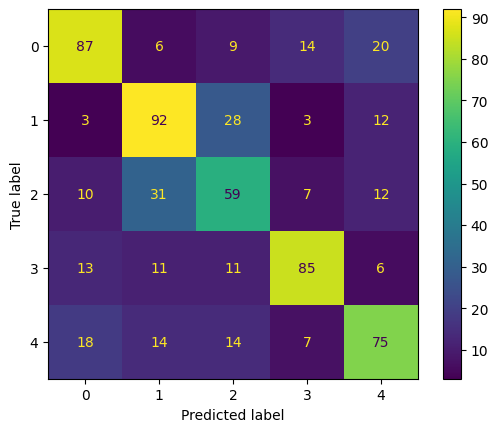

Testset
      Preference  Happiness  Sadness  Hate  ADV_Ratio  NOUN_Ratio  VERB_Ratio  \
0          70.0       19.0      4.0   4.0      0.078       0.359       0.303   
1          70.0        7.0      2.0  12.0      0.063       0.466       0.304   
2          42.0       12.0      4.0  40.0      0.105       0.324       0.344   
3          37.0       12.0     14.0  33.0      0.110       0.279       0.397   
4          59.0       26.0      4.0  11.0      0.110       0.436       0.250   
..          ...        ...      ...   ...        ...         ...         ...   
419        81.0       14.0      0.0   5.0      0.071       0.431       0.292   
420        52.0       45.0      2.0   2.0      0.053       0.591       0.201   
421        51.0       14.0     14.0  19.0      0.106       0.340       0.340   
422        87.0        0.0      0.0  13.0      0.026       0.590       0.224   
423        71.0        9.0      2.0  12.0      0.047       0.445       0.304   

     PRT_Ratio  Mean_Length_of

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# 定義超參數範圍
hyper_params_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 初始化隨機森林分類器
rf_classifier = RandomForestClassifier(random_state=42)

# 使用RandomizedSearchCV進行超參數調整
randomized_search_rf = RandomizedSearchCV(rf_classifier, hyper_params_rf, random_state=100, scoring="f1", n_iter=10)
randomized_search_rf.fit(X_train, y_train)

# 獲取最佳參數
best_params_rf = randomized_search_rf.best_params_
print("最佳參數:", best_params_rf)

# 使用最佳參數的模型對測試集進行預測
best_rf_model = randomized_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# 評估模型準確性
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("最佳模型的F1 Score:", round(f1_rf, 2))

# 顯示其他評估指標
print(classification_report(y_test, y_pred_rf, target_names=target_names))

confusion_matrix_ = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_, 
                                    display_labels=target_names)

cm_display.plot()
plt.show()

import pickle

with open("rf.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)
    
with open("rf.pkl", "rb") as file:
    best_rf_model = pickle.load(file)

## 跟decision tree步驟一樣
pseudo_data1 = pd.DataFrame(pseudo_data, columns=X_train_nm.columns)
pseudo_pred = best_rf_model.predict(pseudo_data1)
print("Testset\n", pseudo_data1)
print("new data prediction:", str(pseudo_pred[0]))


result_df = pd.DataFrame({'Index': range(1, len(pseudo_pred) + 1), 'Category': pseudo_pred})
result_df.set_index('Index', inplace=True)

# Map the numeric categories to the corresponding labels
category_mapping = {
    0: 'Cuisine',
    1: 'Lifestyles',
    2: 'Literature',
    3: 'Self-help',
    4: 'Travel'
}

result_df['Category'] = result_df['Category'].map(category_mapping)

# Print the result DataFrame
result_df.to_excel('Submission(rf).xlsx')